# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выведем общую информацию о датафрейме, посмотрим на типы данных и количество значений.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Судя по максимальному значению, в таблице собраны данные по 23699 объявлениям. Количество значений в переменных сильно разнится, значит в данных есть много пропусков. Также в некоторых столбцах нужно поменять тип данных. Разберемся с этим позже.

Построим гистрограмму для всех столбцов таблицы, чтобы изучить необработанные данные. Также посмотрим на числовое описание данных.  

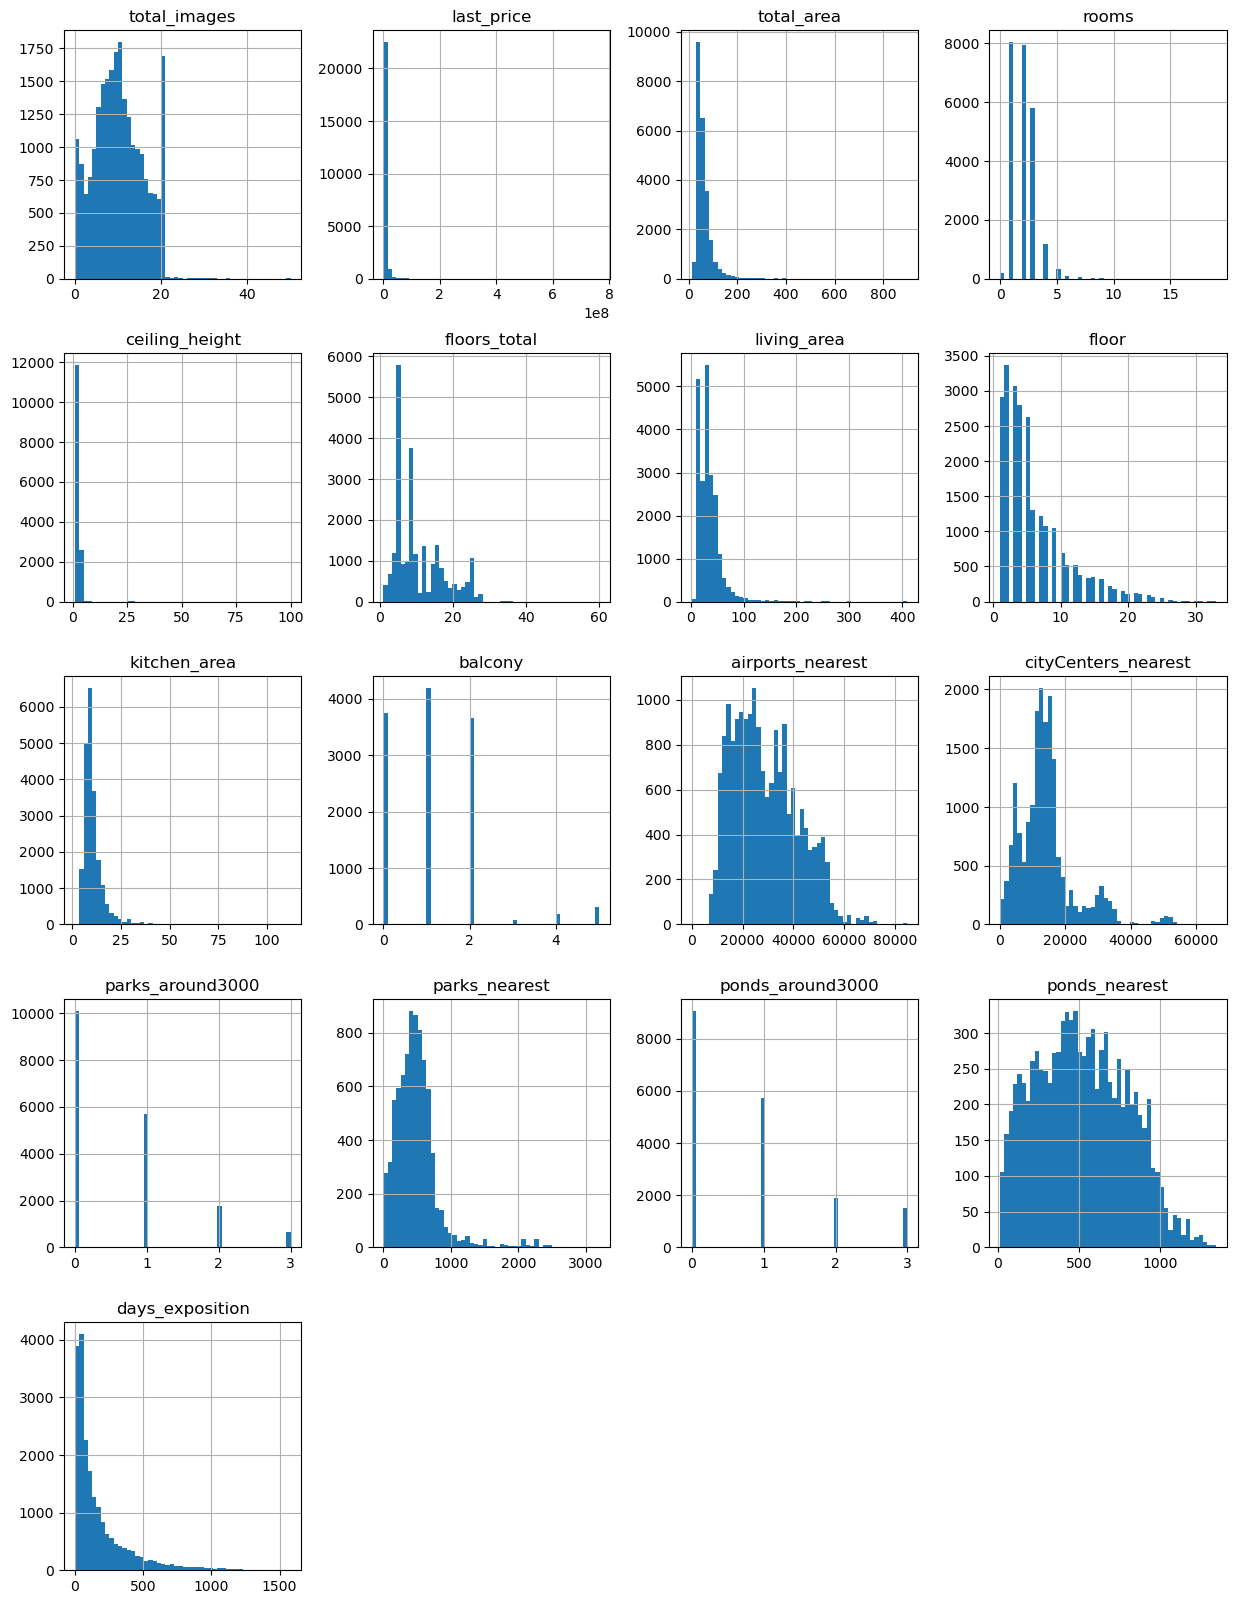

In [4]:
data.hist(figsize=(15, 20), bins=50);

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видно, что в некоторых переменных присутствуют выбросы (floors_total, living_area, total_images). В числовом описании данных тоже заметны странные значения - общая площадь 900м, потолки 1м и 100м, цена 12190. Нужно проверять, что не так.

### Предобработка данных

**Обработка пропусков**

Посмотрим, в каких столбцах есть пропуски.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропусков много, причины могут быть разные, будем разбираться по порядку.

`ceiling_height` - высота потолков. Скорее всего пропуски связаны с тем, что люди не знали точных значений и не хотели их измерять. Помним про выбросы в этом столбце, разберемся с ними позже - сейчас это не помешаем заменить пропуски медианными значениями по городам, а там, где таких данных нет - медианными значениями по региону.

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].isna().sum()

0

`balcony` - наличие балкона. Допустим, что пропуски означают отсутствие балконов и заменим их на нули.

In [8]:
data['balcony'].fillna(0, inplace=True)
data['balcony'].isna().sum()

0

`living_area` - жилая площадь. Напрямую это значение больше всего зависит от общей площади и количества комнат. Попробуем заменить пропуски, сгруппировав данные по величине общей площади.

In [9]:
#check
data[data['total_area']*0.9 <= (data ['living_area']+data ['kitchen_area'])][['total_area'
                                                                                  ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.0,59.0,12.0
171,49.0,38.0,10.0
184,30.2,26.1,6.2
220,37.0,28.0,9.0
319,59.7,47.4,6.4
...,...,...,...
23216,114.0,90.2,16.0
23297,48.2,42.2,6.0
23328,54.0,40.0,10.0
23521,65.0,44.0,15.3


In [10]:
#data.loc[data['living_area'].isna(),'living_area'] = data['total_area'].fillna(data.groupby('total_area')['living_area'].transform('median'))
living_ratio = data['living_area'].median()/data['total_area'].median()
data.loc[data['living_area'].isna(),'living_area'] = ((data['total_area']*living_ratio)).round()
data['living_area'].isna().sum()

0

In [11]:
#check
data[data['total_area']*0.9 <= (data ['living_area']+data ['kitchen_area'])][['total_area'
                                                                                  ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.0,59.0,12.0
171,49.0,38.0,10.0
184,30.2,26.1,6.2
220,37.0,28.0,9.0
319,59.7,47.4,6.4
...,...,...,...
23216,114.0,90.2,16.0
23297,48.2,42.2,6.0
23328,54.0,40.0,10.0
23521,65.0,44.0,15.3


Тоже самое сделаем и с `kitchen_area` - кухонной площадью.

In [12]:
#data.loc[data['kitchen_area'].isna(),'kitchen_area'] = data['total_area'].fillna(data.groupby('total_area')['kitchen_area'].transform('median'))
kitchen_ratio = data['kitchen_area'].median()/data['total_area'].median()
data.loc[data['kitchen_area'].isna(),'kitchen_area'] = ((data['total_area']*kitchen_ratio)).round()
data['kitchen_area'].isna().sum()

0

Проверим, много ли объектов, где общая площадь меньше жилой и кухонной вместе взятых.

In [13]:
#check
data[data['total_area']*0.9 <= (data ['living_area']+data ['kitchen_area'])][['total_area'
                                                                                  ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.0,59.00,12.0
171,49.0,38.00,10.0
184,30.2,26.10,6.2
220,37.0,28.00,9.0
237,28.1,20.75,5.0
...,...,...,...
23216,114.0,90.20,16.0
23297,48.2,42.20,6.0
23328,54.0,40.00,10.0
23521,65.0,44.00,15.3


`is_apartment` - является ли объект апартаментами. Здесь очень большое количество пропусков и делать выводы о том, как их заполнять, из имеющихся данных будет не совсем корректно. Можно либо заменить пропуски на "unknown", либо предположить, что незаполненное поле = False. Поскольку доля апартаментов ежегодно растет, выберем первый вариант.

In [14]:
data['is_apartment'].fillna("unknown", inplace=True)
print(data['is_apartment'].unique())
data['is_apartment'].isna().sum()

['unknown' False True]


0

`days_exposition` - сколько дней было размещено объявление. Вероятно, пропуски означают, что на момент сбора данных объявление было еще актуально. Можно было бы посчитать количество дней с публикации объявления до этого момента. Но т.к. таких данных у нас нет, то оставим все как есть и уберем выбивающиеся значения.

`floors_total` и `locality_name` - количество этажей в доме и название населенного пункта. Количество пропусков в этих столбцах несущественно, поэтому просто их удалим.

In [15]:
data = data.dropna(subset=['floors_total','locality_name'])
print(data['floors_total'].isna().sum())
data['locality_name'].isna().sum()

0


0

`parks_around3000` и `ponds_around3000` - наличие парков и прудов в радиусе 3км. Данные картографические, можно предположить, что пропуски означают отсутствие таких объектов поблизости. Попробуем заменить их на нули.

In [16]:
data['parks_around3000'].fillna(0, inplace=True)
data['ponds_around3000'].fillna(0, inplace=True)
print(data['parks_around3000'].isna().sum())
data['ponds_around3000'].isna().sum()

0


0

`airports_nearest` и `cityCenters_nearest` - расстояние до аэропорта и центра. Попробуем заполнить мединными значениями по локации, остальное пока оставим как есть.
`parks_nearest` и `ponds_nearest` - расстояние до парков и прудов. С ними поступим так же.

In [17]:
data['airports_nearest'] = (
    data['airports_nearest']
    .fillna(data.groupby('locality_name')['airports_nearest'].transform('median'))
)
data['cityCenters_nearest'] = (
    data['cityCenters_nearest'].
    fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))
)
data['parks_nearest'] = data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('median'))
data['ponds_nearest'] = data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('median'))
print(data['airports_nearest'].isna().sum())
print(data['cityCenters_nearest'].isna().sum())
print(data['parks_nearest'].isna().sum())
data['ponds_nearest'].isna().sum()

5432
5432
5986


5517

Повторно выведем таблицу с пропусками и проверим их количество после изменений.

In [18]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5432
cityCenters_nearest     5432
parks_around3000           0
parks_nearest           5986
ponds_around3000           0
ponds_nearest           5517
days_exposition         3171
dtype: int64

Заполнили пропущенные значения насколько это было возможно. В нескольких столбцах пропуски остались, но их доля несущественна и эти данные почти не используются в дальнейшем, поэтому не исказят результаты.

**Замена типов данных в столбцах**

Повторно выведем информацию о типах данных и посмотрим, что нужно поменять.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Поменяем данные в last_price, floors_total, balcony, parks_around3000, ponds_around3000, days_exposition в целочисленный формат.
Столбцы с расстояниями содержат пропуски, поэтому их мы просто округлим.
А first_day_exposition приведем к соответствующему формату.

In [20]:
for col in ['last_price','floors_total','balcony','parks_around3000',
            'ponds_around3000']:
    data[col] = data[col].astype('int')

for col in ['airports_nearest','cityCenters_nearest','parks_nearest','ponds_nearest']:
    data[col] = data[col].round()
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Исправим названия некоторых столбцов на более читабельные.

In [21]:
data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3000',
                    'ponds_around3000':'ponds_around_3000'}, inplace=True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,unknown,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,unknown,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,584.0,81.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,unknown,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.70,14,92.0,9,unknown,...,28.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,unknown,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


Привели данные и названия столбцов к необходимому типу, чтобы в дальнейшем с ними было удобно работать.

**Обработка дубликатов**

Проверим датасет на наличие явных дубликатов.

In [22]:
data.duplicated().sum()

0

Явных дубликатов нет! Теперь посмотрим, есть ли скрытые дубликаты в переменной locality_name.

In [23]:
print('Количество уникальных локаций:', len(data['locality_name'].unique()))
data['locality_name'].unique()

Количество уникальных локаций: 364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Для обработки дубликатов в названиях поселков заменим Ё на Е. Есть разные варианты написания типов поселения - заменим все городские поселки на поселки городского типа, также поступим с садовыми товариществами и поселками при станциях.

In [24]:
data.locality_name = data.locality_name.str.replace('ё','е')
data.locality_name = data.locality_name.str.replace('городской поселок','поселок городского типа')
data.locality_name = data.locality_name.str.replace('поселок при железнодорожной станции','поселок при станции')
data.locality_name = data.locality_name.str.replace('садовое некоммерческое товарищество','садовое товарищество')
print('Количество уникальных локаций:', len(data['locality_name'].unique()))
data['locality_name'].unique()

Количество уникальных локаций: 323


array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

Обработали дубликаты в типах населенных пунктов и их названиях, вызванных разным написанием.

**Обработка аномалий**

Ранее мы уже выводили числовое описание столбцов, разберемся с выбивающимися значениями в них.

**Высота потолка**

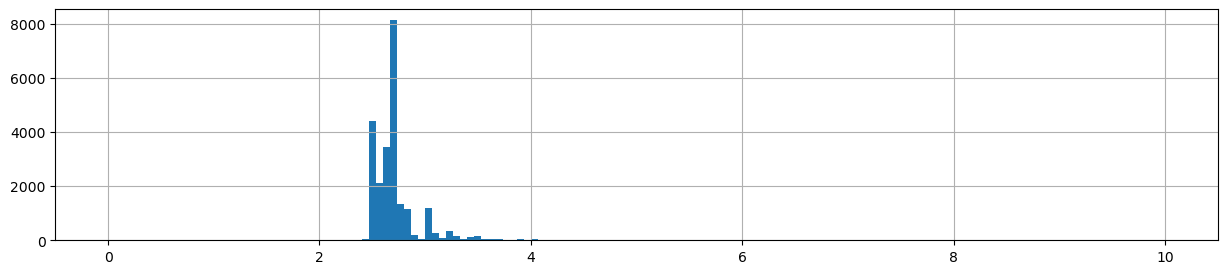

In [25]:
data['ceiling_height'].describe()
data.ceiling_height.hist(bins = 150, figsize = (15,3), range=(0,10));

Понятно, что минимальная высота потолка 1м, а максимальная - 100м не может быть правдой. По СНиПу минимальная высота потолка - 2.5м, но возьмем небольшой запас и ограничимся диапазоном 2.4-3.5м  и проверим, есть ли еще слишком большие значения.

In [26]:
data.query('ceiling_height > 10')['ceiling_height']

313       13.85
355       25.00
2158      27.00
3148      32.00
4643      25.00
4876      27.00
5076      24.00
5246      27.00
5669      26.00
5807      27.00
6246      25.00
9379      25.00
10067     13.85
10069     13.85
10773     27.00
11285     25.00
14382     25.00
15061     14.00
17496     20.00
17857     27.00
18545     25.00
20478     27.00
20507     22.60
21377     27.50
21824     27.00
22309     10.30
22336     32.00
22869    100.00
22938     27.00
Name: ceiling_height, dtype: float64

Высота 100м - явно выброс, просто удалим его. Остальные значения, вероятно, являются ошибкой ручного ввода - поделим на 10.

In [27]:
data = data.drop(data[data['ceiling_height'] < 2.4].index)
data = data.drop(data[data['ceiling_height'] == 100].index)
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10
data = data.drop(data[(data['ceiling_height'] >= 3.5)].index)
data['ceiling_height'].describe()

count    23117.000000
mean         2.685182
std          0.170011
min          2.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          3.490000
Name: ceiling_height, dtype: float64

**Стоимость**

count        23117
mean       6299334
std       10124008
min          12190
25%        3400000
50%        4600000
75%        6650000
max      763000000
Name: last_price, dtype: int64
8793      12190
17456    430000
14911    430000
16274    440000
16219    450000
Name: last_price, dtype: int64


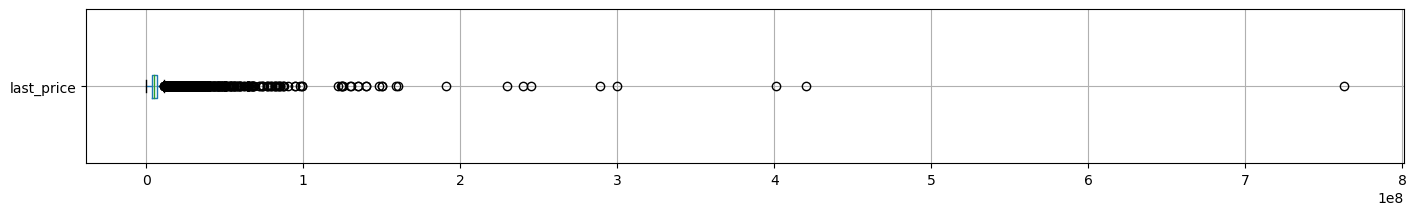

In [28]:
print(data['last_price'].describe().astype('int'))
print(data['last_price'].sort_values(ascending=True).head())
data.boxplot(column='last_price', figsize=(17,2), vert=False);
plt.show()

Судя по всему, цена 12190 - выброс, просто удалим его. Единичные выбросы выше 25 млн. тоже удалим.

In [29]:
data = data.drop(data[(data['last_price'] == 12190)].index)
data = data.drop(data[(data['last_price'] > 25000000)].index)
data['last_price'].describe()

count    2.272700e+04
mean     5.525242e+06
std      3.560278e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      2.500000e+07
Name: last_price, dtype: float64

**Общая площадь**

count    22727.000000
mean        57.035519
std         25.817755
min         12.000000
25%         40.000000
50%         51.000000
75%         67.200000
max        460.800000
Name: total_area, dtype: float64


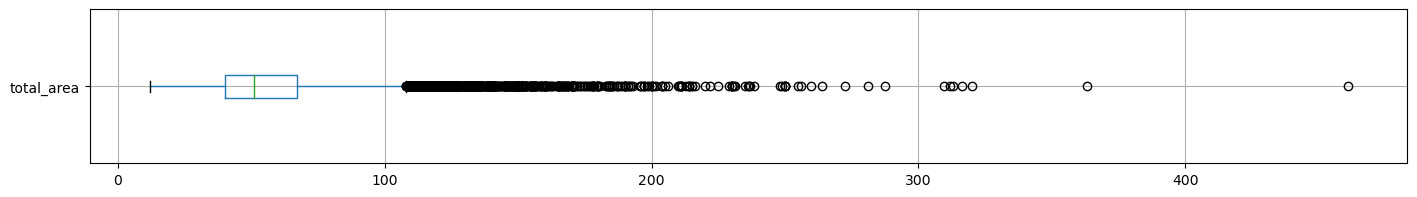

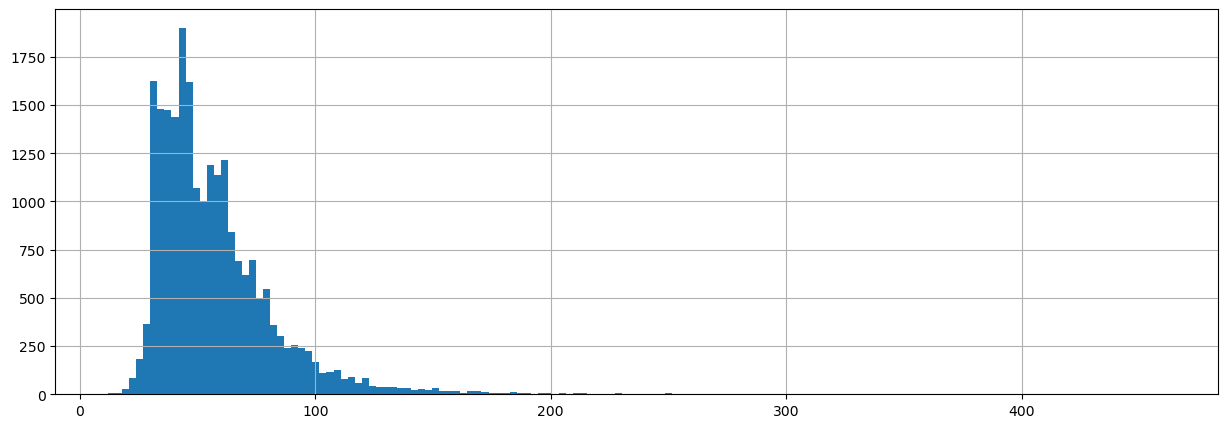

In [30]:
print(data['total_area'].describe())
data.boxplot(column='total_area', figsize=(17,2), vert=False);
plt.show()
data.total_area.hist(bins = 150, figsize=(15,5));

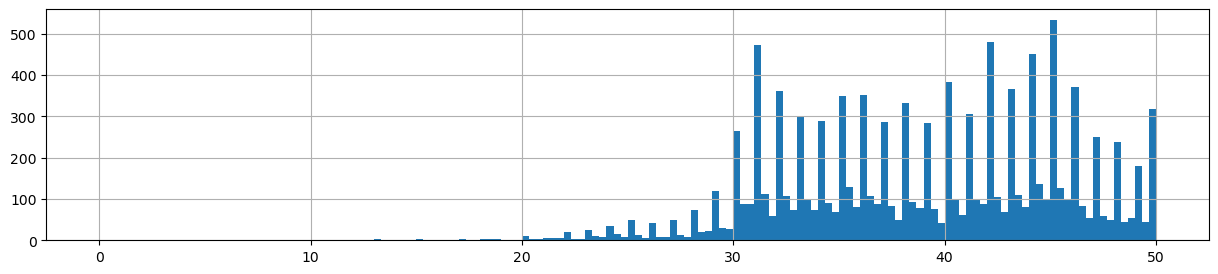

In [31]:
data.total_area.hist(bins = 150, figsize=(15,3), range=(0,50));

Видим, что основная часть значений находятся в диапазоне от 23 до 200 000. Поэтому попробуем отсеить объявления вне этой категории .

In [32]:
data = data.drop(data[data['total_area'] < 23].index)
data = data.drop(data[data['total_area'] > 200].index)
data['total_area'].describe()

count    22586.000000
mean        56.712857
std         23.958846
min         23.000000
25%         40.000000
50%         51.000000
75%         67.100000
max        200.000000
Name: total_area, dtype: float64

**Жилая площадь**

count    22586.000000
mean        32.483840
std         15.918222
min          2.000000
25%         19.000000
50%         30.000000
75%         41.000000
max        159.600000
Name: living_area, dtype: float64


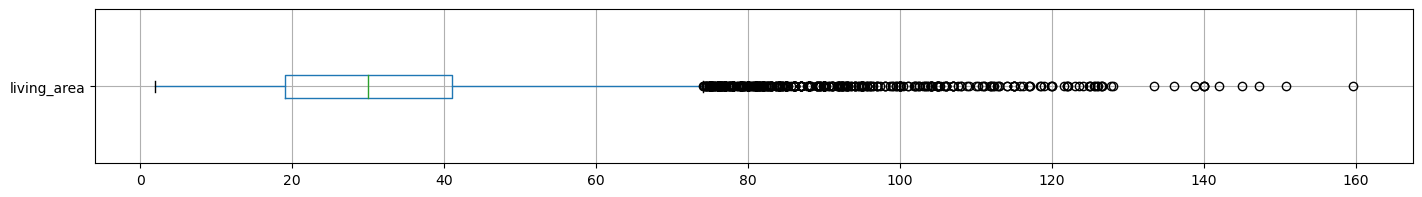

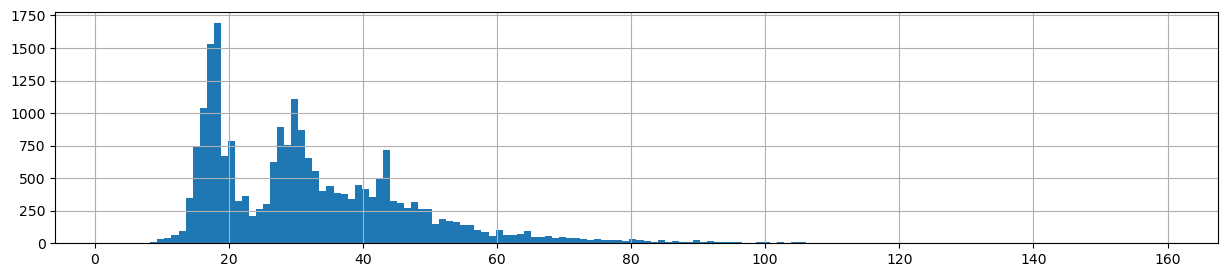

In [33]:
print(data['living_area'].describe())
data.boxplot(column='living_area', figsize=(17,2), vert=False);
plt.show()
data.living_area.hist(bins = 150, figsize = (15,3));

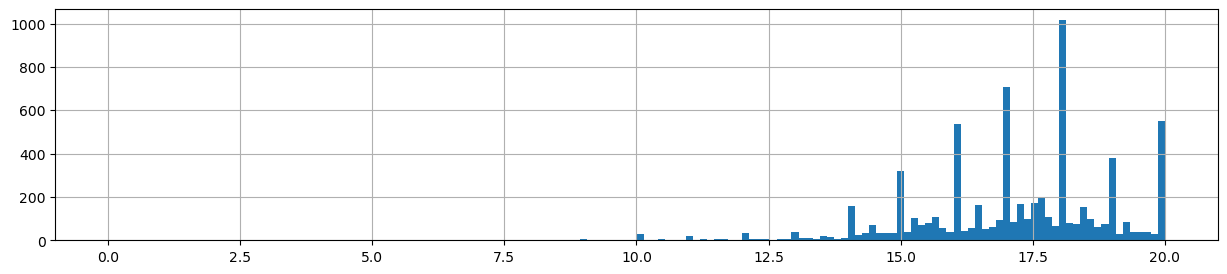

In [34]:
data.living_area.hist(bins = 150, figsize = (15,3), range=(0,20));

Видим, что большая часть значений располагается примерно в диапазоне 10-110 кв.м. Отбросим лишнее, чтобы не мешало анализу в дальнейшем. 

In [35]:
data = data.drop(data[data['living_area'] < 10].index)
data = data.drop(data[data['living_area'] > 110].index)
data['living_area'].describe()

count    22505.000000
mean        32.265446
std         15.212718
min         10.000000
25%         19.000000
50%         30.000000
75%         41.000000
max        110.000000
Name: living_area, dtype: float64

**Площадь кухни**

count    22505.000000
mean        10.036200
std          4.765391
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         65.000000
Name: kitchen_area, dtype: float64


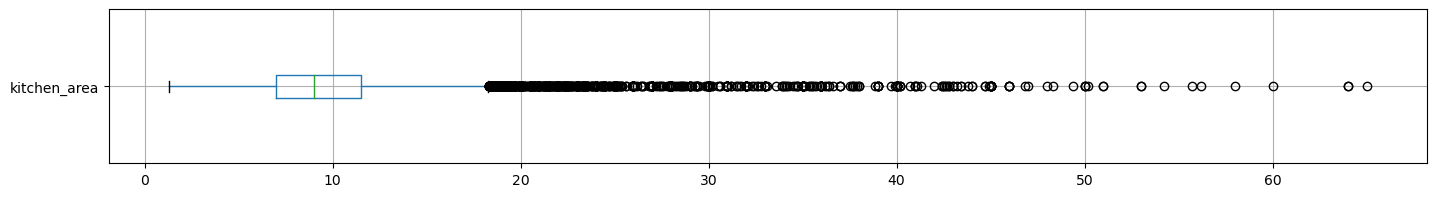

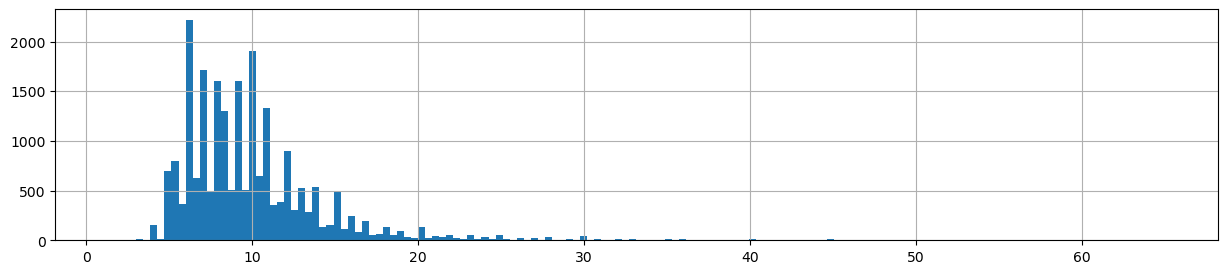

In [36]:
print(data['kitchen_area'].describe())
data.boxplot(column='kitchen_area', figsize=(17,2), vert=False);
plt.show()
data.kitchen_area.hist(bins = 150, figsize = (15,3));

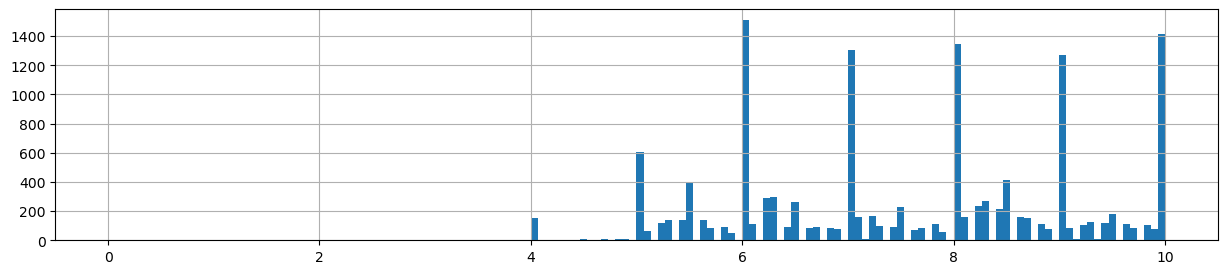

In [37]:
data.kitchen_area.hist(bins = 150, figsize = (15,3), range=(0,10));

Максимальное значение в 100 кв.м. кажется странным, т.к. общую площадь мы ограничили 200 кв.м. Попробуем ограничить выборку 4-60 кв.м.

In [38]:
data = data.drop(data[data['kitchen_area'] < 4].index)
data = data.drop(data[data['kitchen_area'] > 60].index)
data['kitchen_area'].describe()

count    22481.000000
mean        10.035674
std          4.721326
min          4.000000
25%          7.000000
50%          9.000000
75%         11.500000
max         60.000000
Name: kitchen_area, dtype: float64

**Количество этажей в доме** 

In [39]:
data['floors_total'].describe()

count    22481.000000
mean        10.824118
std          6.625924
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

 На сегодняшний день самое высокое жилое здание в Санкт-Петербурге состоит из 37 этажей, поэтому уберем все, что больше этого значения.

In [40]:
data = data.drop(data[data['floors_total'] > 37].index)
data['floors_total'].describe()

count    22479.000000
mean        10.820099
std          6.612394
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

**Количество дней** 

count    19555.000000
mean       177.757300
std        216.508021
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64


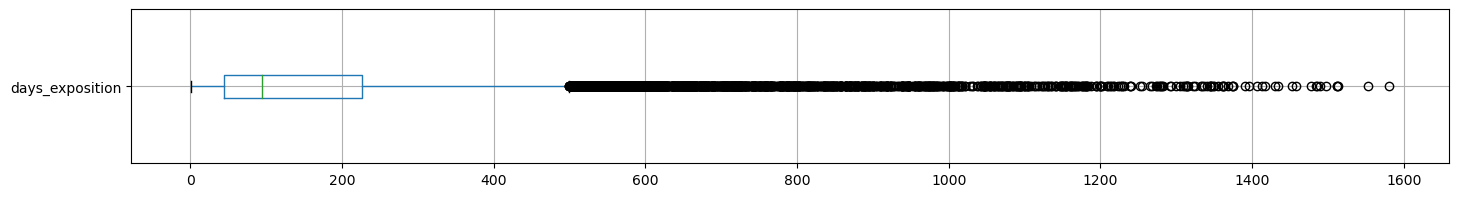

In [41]:
print(data['days_exposition'].describe())
data.boxplot(column='days_exposition', figsize=(17,2), vert=False);
plt.show()

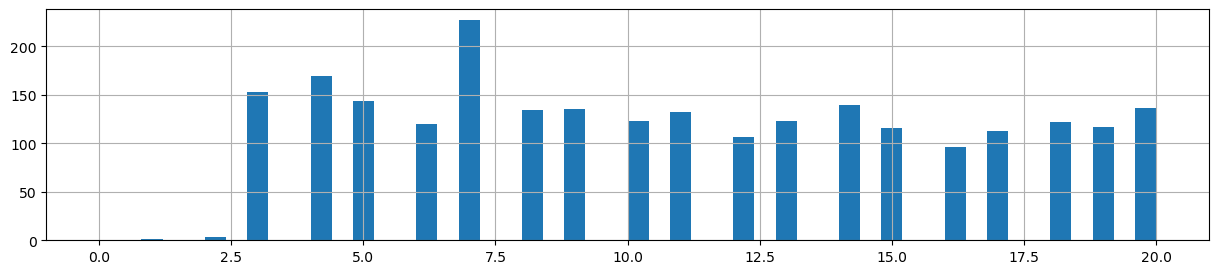

In [42]:
data.days_exposition.hist(bins = 50, figsize = (15,3), range=(0,20));

Видим, что медиана и среднее значение сильно отличаются, а максимальный срок составляет более 4 лет. Возможно, некоторые объявления просто забывали удалить после продажи. Также минимальный срок продажи начинается примерно с 3 дней. Попробуем ограничить выборку 3-1200 днями.

In [43]:
data = data.drop(data[data['days_exposition'] < 3].index)
data = data.drop(data[data['days_exposition'] > 1200].index)
data['days_exposition'].describe()

count    19474.000000
mean       173.214748
std        204.223579
min          3.000000
25%         44.000000
50%         93.000000
75%        223.000000
max       1200.000000
Name: days_exposition, dtype: float64

**Комнаты**

In [44]:
data.rooms.value_counts().to_frame()

,rooms
1,7839
2,7714
3,5480
4,986
5,174
0,168
6,27
7,9
8,1


Квартир с комнатами больше 7 мало, уберем их.

In [45]:
data = data.drop(data[data['rooms'] > 7].index)
data['rooms'].describe()

count    22397.000000
mean         1.997857
std          0.948719
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [46]:
# check
data.shape

(22397, 22)

Восстановили корректные значения там, где природа аномалии понятна и данные действительно искажены. В иных случаях, ограничили выборку данных и удалили выбросы и выбивающиеся значения.

In [47]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7839
2,7714
3,5480
4,986
5,174
0,168
6,27
7,9


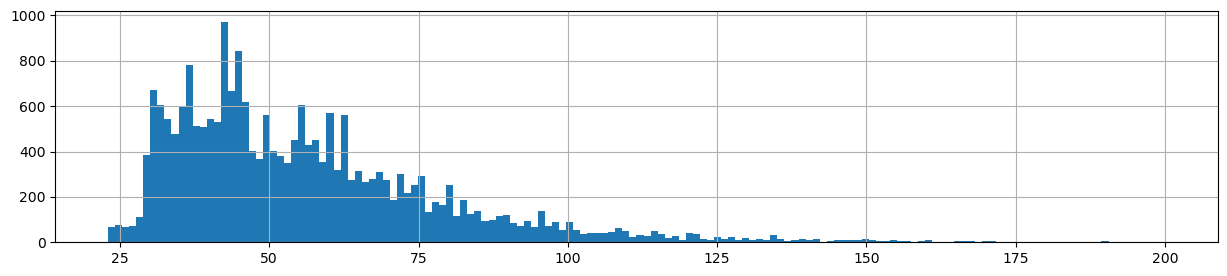

In [48]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

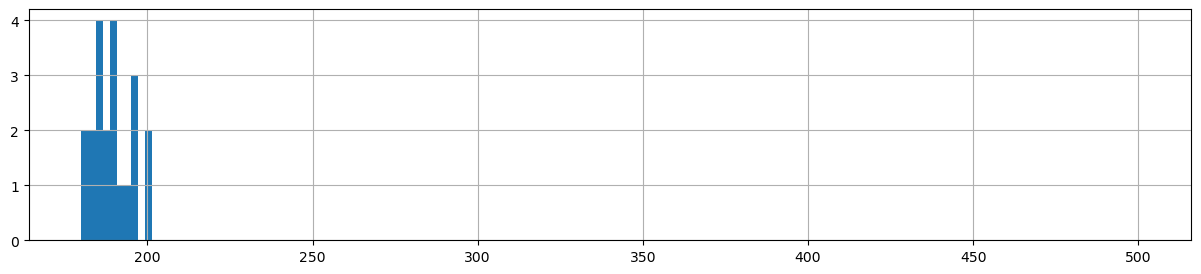

In [49]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

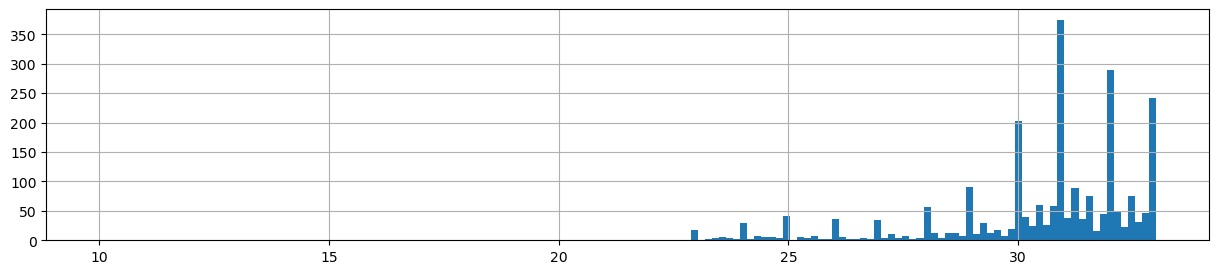

In [50]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (10,33));

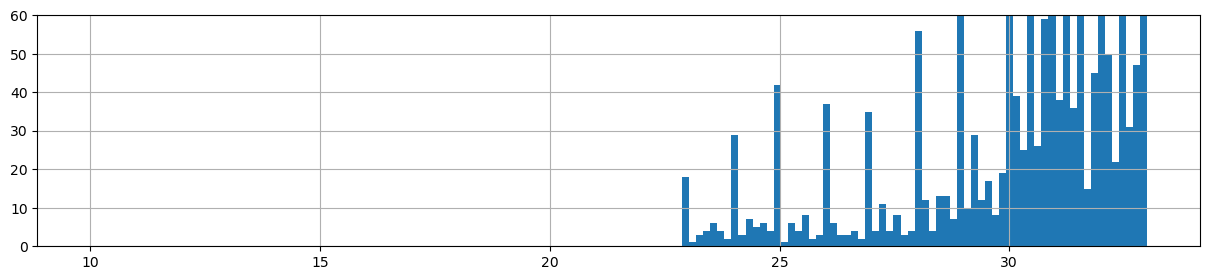

In [51]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (10,33))
plt.ylim(0,60);

In [52]:
# check

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.010000,1.00,27.00,2.50,4.00,"1,000,000.00",13.50,5.00,1.00,2.00
0.500000,2.00,51.00,2.70,93.00,"4,550,000.00",30.00,9.00,4.00,9.00
0.900000,3.00,86.04,2.85,442.00,"9,500,000.00",51.40,15.00,13.00,22.00
0.997600,5.00,165.05,3.40,"1,135.26","23,633,723.20",99.12,40.32,25.00,27.00


### Расчеты

**Цена одного квадратного метра**

Рассчитаем как соотношение цены и общей площади.

In [53]:
data['price_per_metre'] = (data['last_price'] / data['total_area']).round().astype('int')

**День недели, месяц и год публикации объявления**

Рассчитаем на основе значений first_day_exposition.

In [54]:
data['weekday'] = data['first_day_exposition'].dt.weekday.astype('int8')
data['month'] = data['first_day_exposition'].dt.month.astype('int8')
data['year'] = data['first_day_exposition'].dt.year.astype('int16')

**Тип этажа квартиры**

Проверим, какие этажи вообще есть и исходя из значений floor и floors_total отнесем этаж к категориям: первый, последний, другой.

In [55]:
data.floor.unique()

array([ 8,  1,  4, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15,  9, 18, 10, 19,
       16, 20, 27, 17, 14, 12, 21, 28, 24, 25, 23, 30, 29, 32, 33, 31])

In [56]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

**Расстояние до центра в км**

Используем значения из city_centers_nearest, делим на 1000.

In [57]:
data['city_center_km'] = (data['city_centers_nearest'] / 1000).round().astype('int', errors='ignore')

Выведем первые пять строк датасета и проверим, на месте ли новые столбцы и данные в них.

In [58]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_metre,weekday,month,year,floor_type,city_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,unknown,...,482.0,2,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,unknown,...,NaN,0,584.0,81.0,82921,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,unknown,...,90.0,2,574.0,558.0,92786,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,unknown,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.60,12,14.4,5,unknown,...,NaN,0,NaN,55.0,95066,0,9,2018,другой,NaN


Добавили новые столбцы, необходимые для дальнейшего анализа данных.

### Проведите исследовательский анализ данных

Проанализируем значения в основных переменных, которые потребуются для дальнейшего анализа.

**Общая площадь**

count    22397.000000
mean        56.364539
std         23.136896
min         23.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        200.000000
Name: total_area, dtype: float64


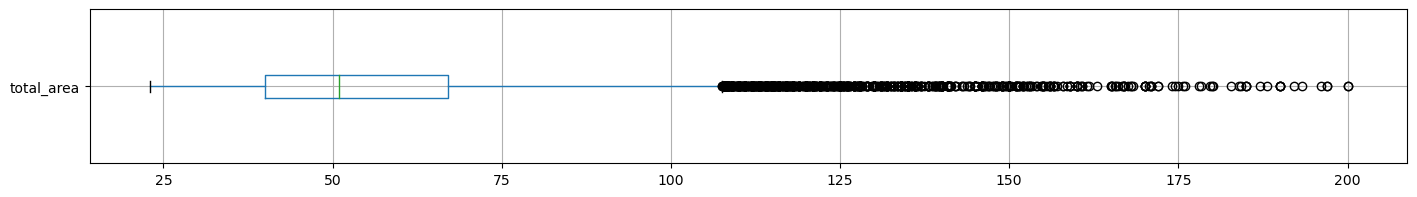

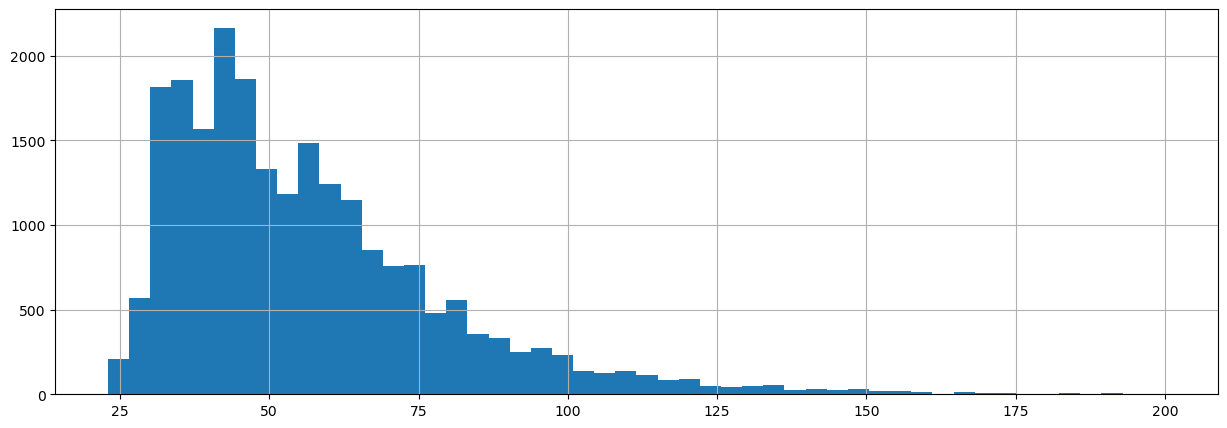

In [59]:
print(data['total_area'].describe())   
data.boxplot('total_area', figsize=(17,2), vert=False)
plt.show()
data['total_area'].hist(bins=50, figsize=(15, 5));

Медиана и среднее значение почти совпадают, значит выбросов нет. Основная часть значений лежит в диапазоне от 30 до 70 кв.м. Есть резкий скачок по площади от 30 до 35 кв.м. Больше всего квартир с площадью 45 кв.м.

**Жилая площадь**

count    22397.000000
mean        32.234910
std         15.178727
min         10.000000
25%         18.900000
50%         30.000000
75%         41.000000
max        110.000000
Name: living_area, dtype: float64


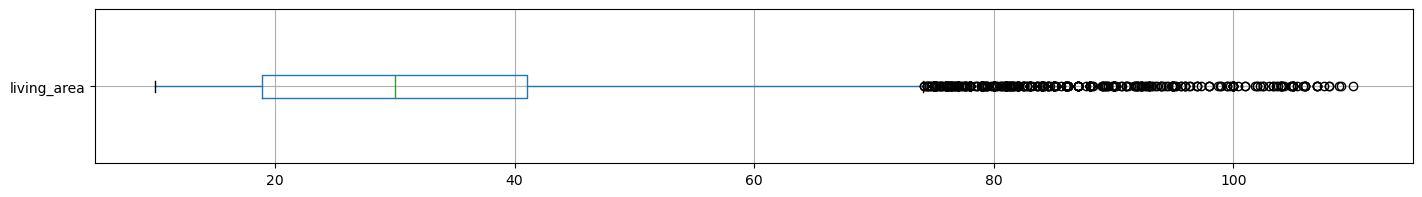

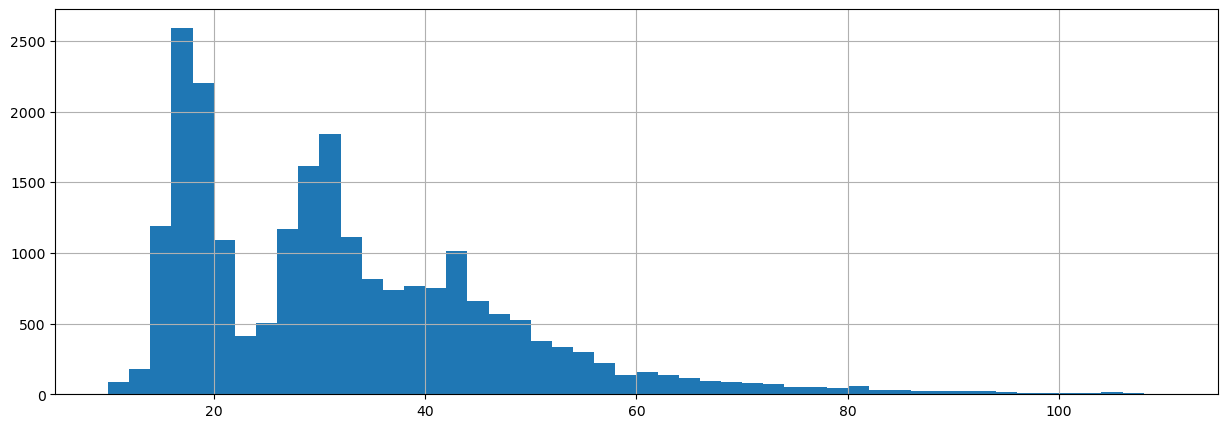

In [60]:
print(data['living_area'].describe())   
data.boxplot('living_area', figsize=(17,2), vert=False)
plt.show()
data['living_area'].hist(bins=50, figsize=(15, 5));

В основном, жилая площадь составляет от 15 до 45 кв.м. Видим резкий спад на отметке 25 кв.м. Позднее проверим, с чем это может быть связано.

**Площадь кухни**

count    22397.00000
mean        10.02914
std          4.71537
min          4.00000
25%          7.00000
50%          9.00000
75%         11.50000
max         60.00000
Name: kitchen_area, dtype: float64


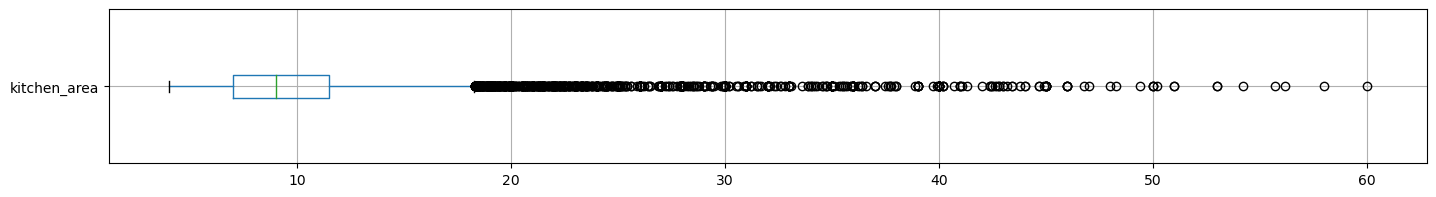

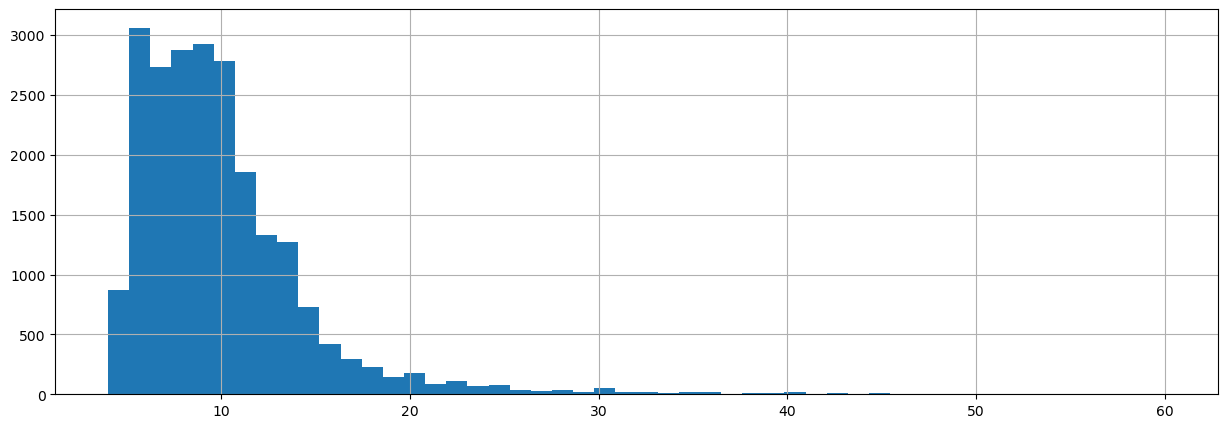

In [61]:
print(data['kitchen_area'].describe())   
data.boxplot('kitchen_area', figsize=(17,2), vert=False)
plt.show()
data['kitchen_area'].hist(bins=50, figsize=(15, 5));

Медиана и среднее значение совпадают, данные выглядят корректными, основная часть кухонных площадей приходится на 5-15 кв.м.

**Цена объекта**

count    2.239700e+04
mean     5.466360e+06
std      3.440734e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.470000e+06
max      2.500000e+07
Name: last_price, dtype: float64


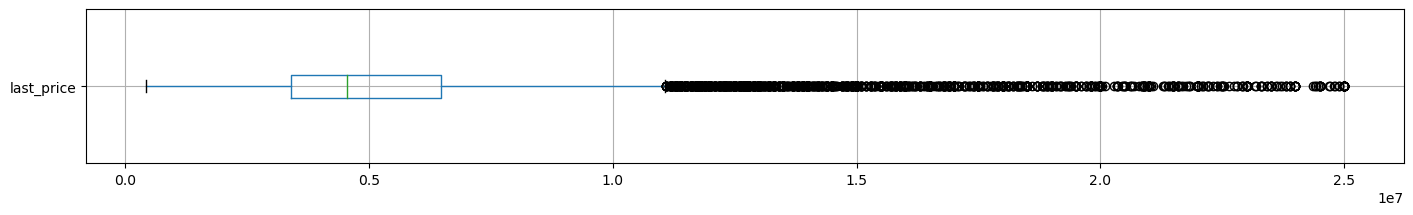

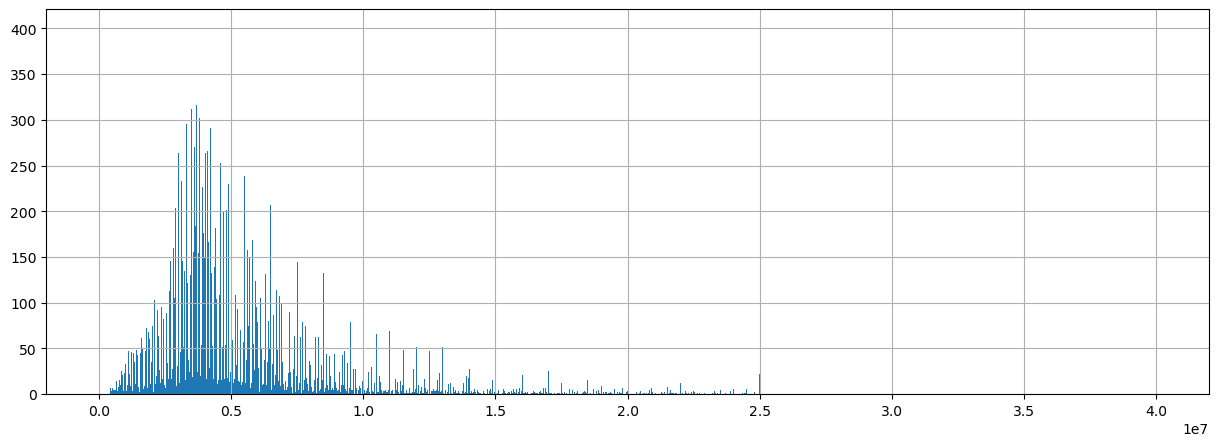

In [62]:
print(data['last_price'].describe())   
data.boxplot('last_price', figsize=(17,2), vert=False)
plt.show()
data['last_price'].hist(bins=1500, figsize=(15,5), range=(0,40000000));

Медиана и среднее значение достаточно близки, несмотря на большой разброс в стоимости. Видно, что в основном стоимость объектов составляет около 2-8 млн. 

**Количество комнат**

count    22397.000000
mean         1.997857
std          0.948719
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


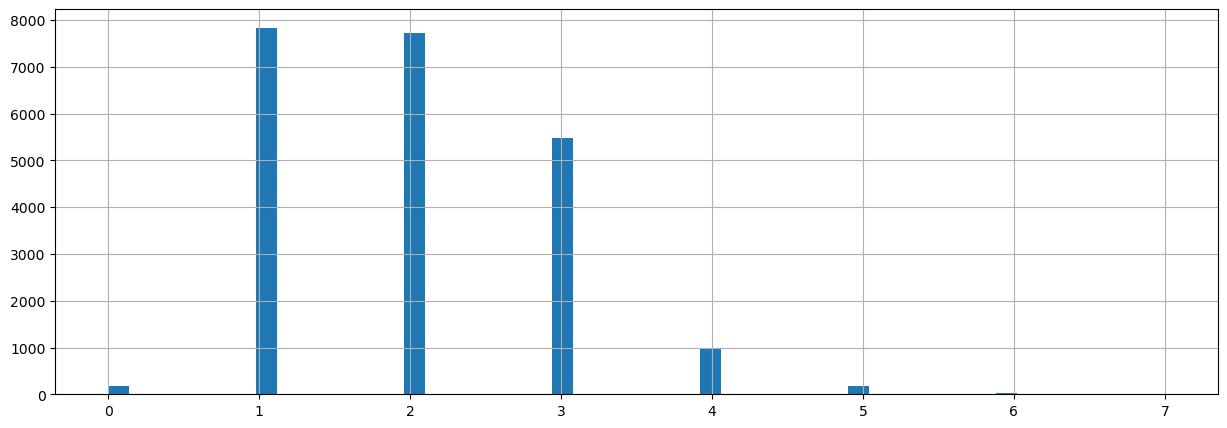

In [63]:
print(data['rooms'].describe())
data['rooms'].hist(bins=50, figsize=(15, 5));

Большинство объявлений на сайте о продаже 1-комнатные, 2х-комнатные и 3х-комнатные. Редко встречаются объекты с более, чем 5.

**Высота потолков**

count    22397.000000
mean         2.679408
std          0.163706
min          2.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          3.490000
Name: ceiling_height, dtype: float64


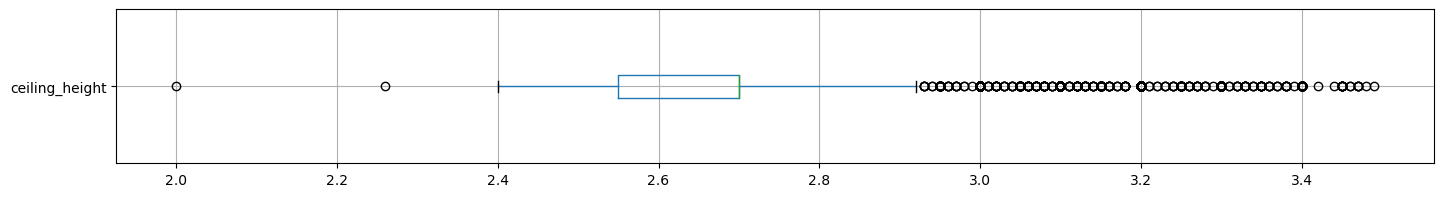

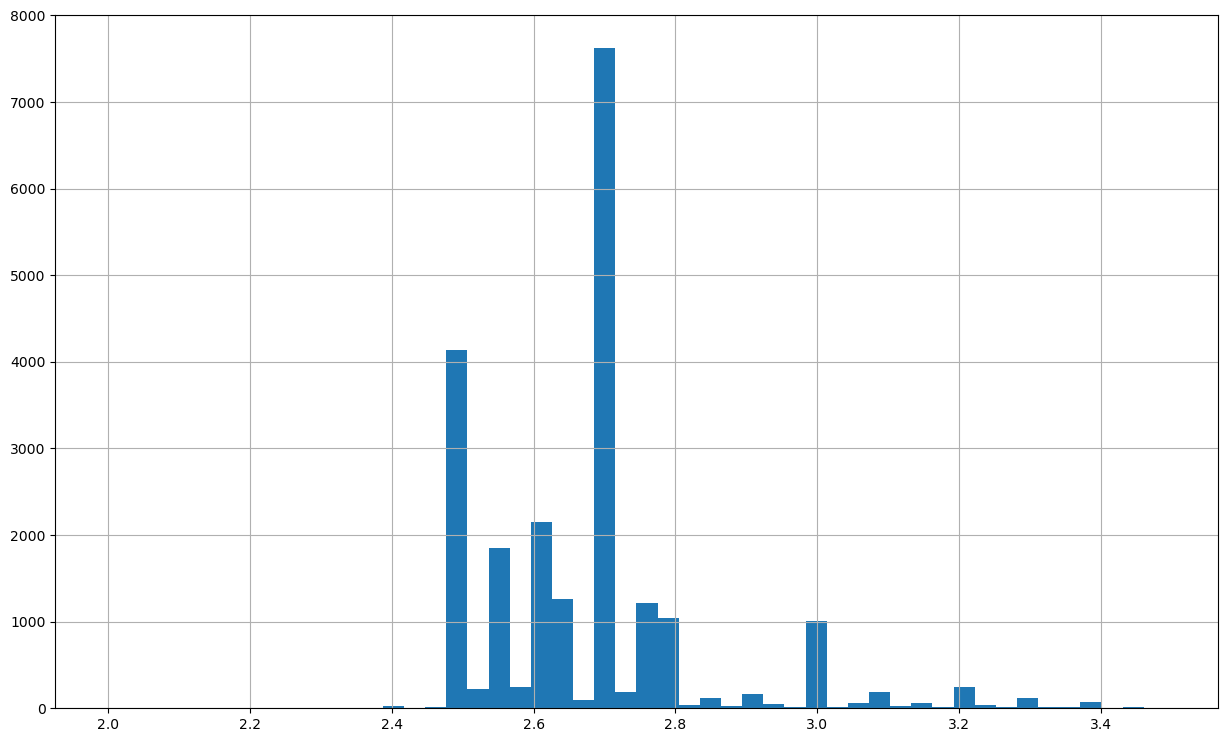

In [64]:
print(data['ceiling_height'].describe())   
data.boxplot('ceiling_height', figsize=(17,2), vert=False)
plt.show()
data['ceiling_height'].hist(bins=50, figsize=(15, 9));

В большинстве объектах стандартная высота потолка - 2.5, 2.7м. Высота более 3м. встречается редко.

**Этаж квартиры**

count    22397.000000
mean         5.930705
std          4.905048
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


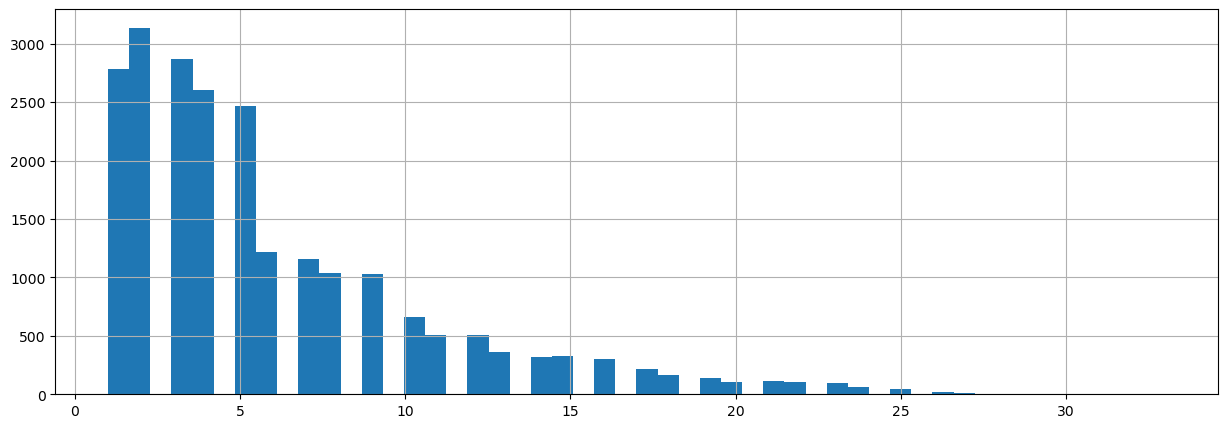

In [65]:
print(data['floor'].describe())   
data['floor'].hist(bins=50, figsize=(15, 5));

Больше всего объявлений по объектам на 1-5 этажах. Чем выше этаж, тем ниже предложение. Это может быть связано с тем, что в Санкт-Петербурге вторичное жилье имеет меньше этажей, чем новостройки, которые обычно покупают еще на этапе строительства.

**Тип этажа квартиры**

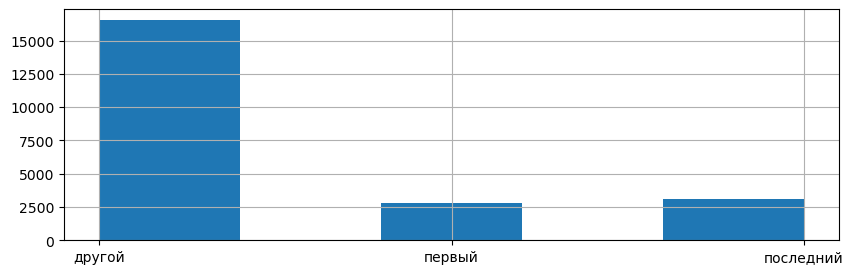

In [66]:
data['floor_type'].describe()
data['floor_type'].hist(bins=5, figsize=(10,3));

Ожидаемо, объектов на первом и последнем этажах меньше, чем на других.

**Всего этажей**

count    22397.000000
mean        10.823950
std          6.613568
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64


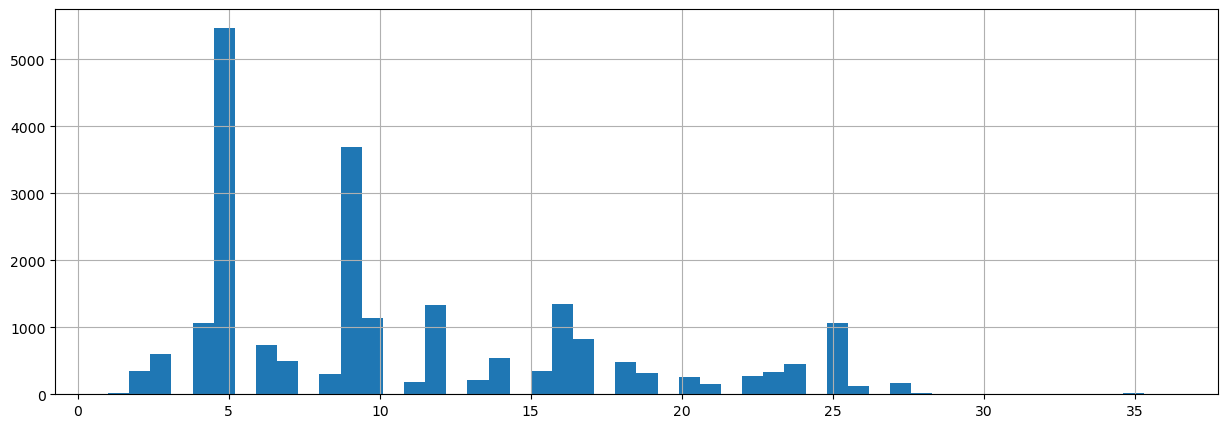

In [67]:
print(data['floors_total'].describe())   
data['floors_total'].hist(bins=50, figsize=(15, 5));

Больше всего объектов находятся в 5-ти и 9-ти этажных домах. Также часто встречаются объявления из 4-х, 10-ти, 12-ти, 16-ти и 25-ти этажных домах. Все выглядит корректно, другие по этажности дома встречаются нечасто.

**Расстояние до центра города**

count    17078.000000
mean     14611.821115
std       8503.474245
min        287.000000
25%      10078.500000
50%      13321.000000
75%      16465.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


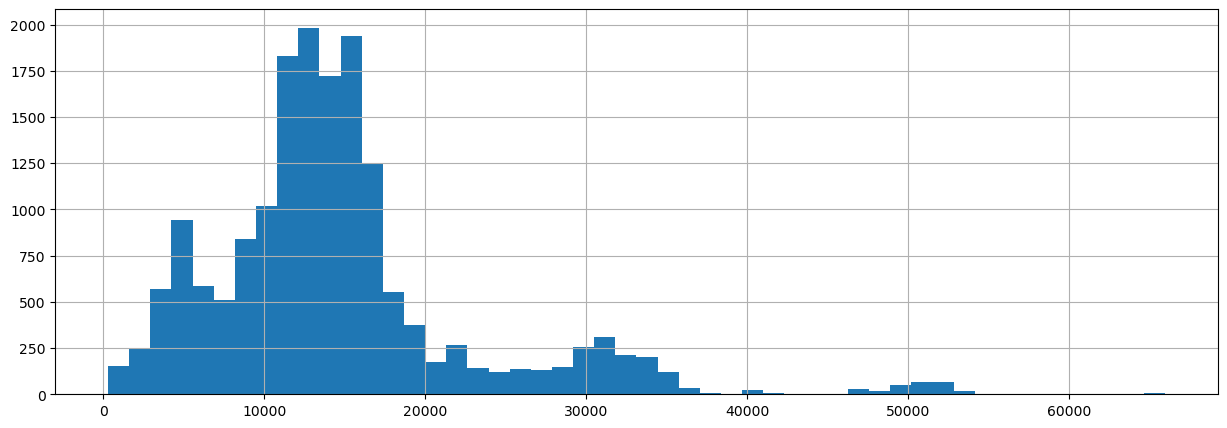

In [68]:
print(data['city_centers_nearest'].describe())   
data['city_centers_nearest'].hist(bins=50, figsize=(15, 5));

Большая часть продаваемых объектов удалена от центра 13-15км.

**Расстояние до ближайшего аэропорта**

count    17078.000000
mean     28944.404321
std      12823.721167
min          0.000000
25%      18344.000000
50%      27105.500000
75%      37473.000000
max      84869.000000
Name: airports_nearest, dtype: float64


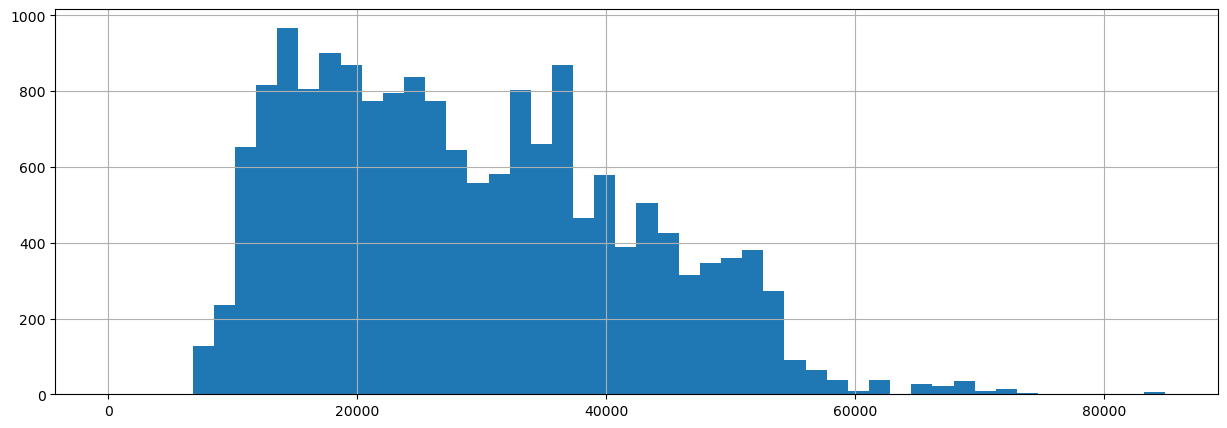

In [69]:
print(data['airports_nearest'].describe())   
data['airports_nearest'].hist(bins=50, figsize=(15, 5));

Среднее расстояние до аэропорта около 12-35 км.

**Расстояние до ближайшего парка**

count    16534.000000
mean       477.982158
std        233.125696
min          1.000000
25%        435.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64


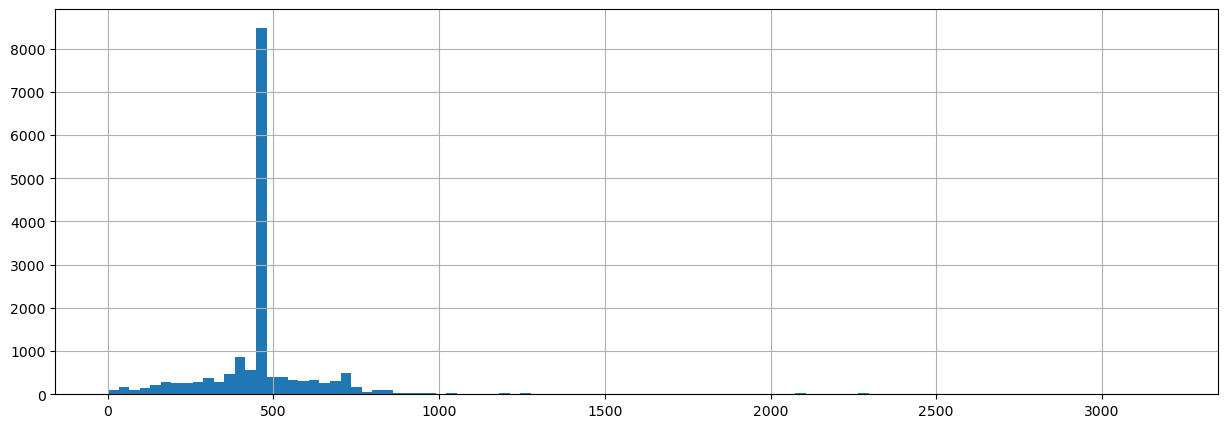

In [70]:
print(data['parks_nearest'].describe())   
data['parks_nearest'].hist(bins=100, figsize=(15, 5));

Среднее расстояние до парка - 400-500м. Почти все объекты находятся в радиусе 1км. от ближайшего парка.

**День и месяц публикации объявления**

count    22397.000000
mean         2.571505
std          1.790645
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64


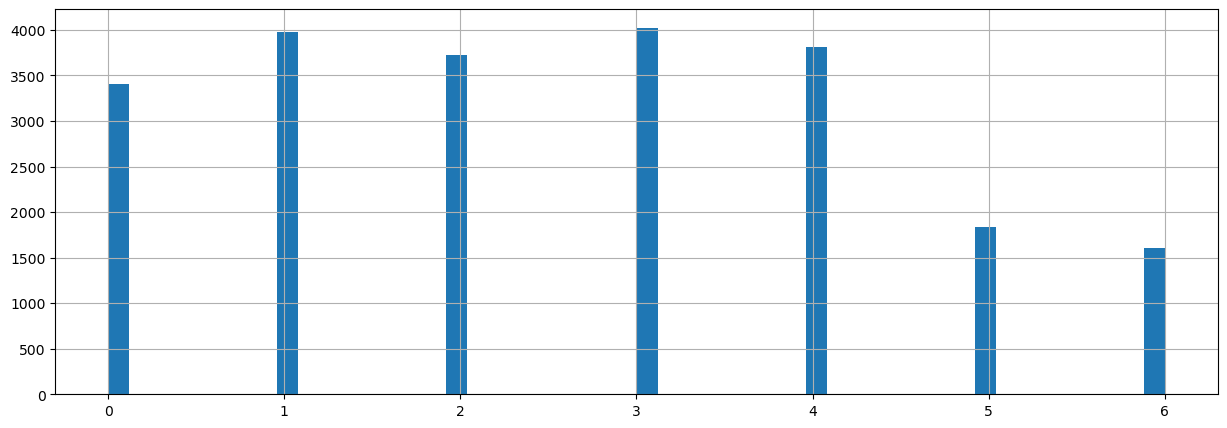

In [71]:
print(data['weekday'].describe())
data['weekday'].hist(bins=50, figsize=(15, 5));

В основном объявления публикуются в будние дни, особенно в понедельник и среду. Меньше всего - в воскресенье.

count    22397.000000
mean         6.404831
std          3.491029
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


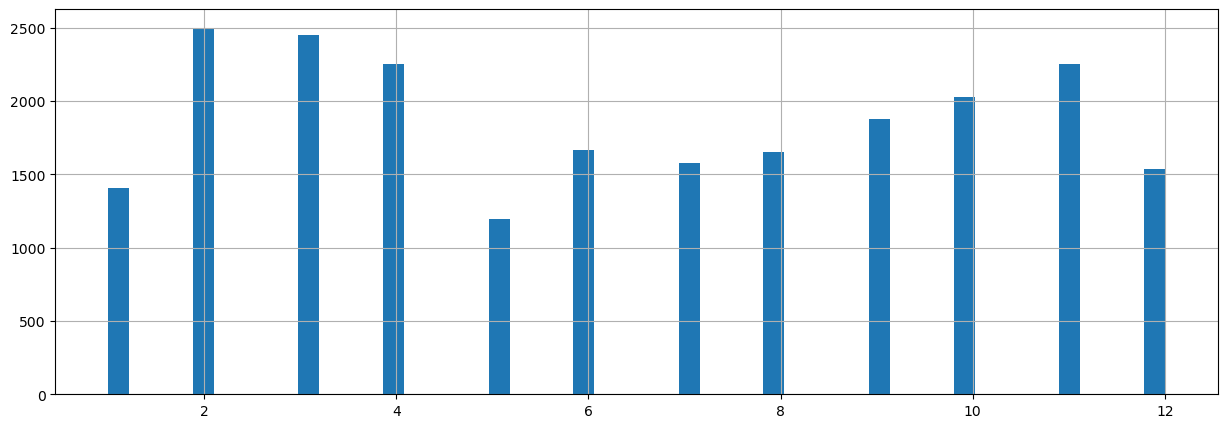

In [72]:
print(data['month'].describe())
data['month'].hist(bins=50, figsize=(15, 5));

Больше всего объявлений публикуется с февраля по апрель и в ноябре. Летом заметна просадка - вероятно, люди в отпусках и им не до этого.

**Как быстро продавались квартиры**

Среднее = 173.21474786895348
Медиана = 93.0
count    19474.000000
mean       173.214748
std        204.223579
min          3.000000
25%         44.000000
50%         93.000000
75%        223.000000
max       1200.000000
Name: days_exposition, dtype: float64


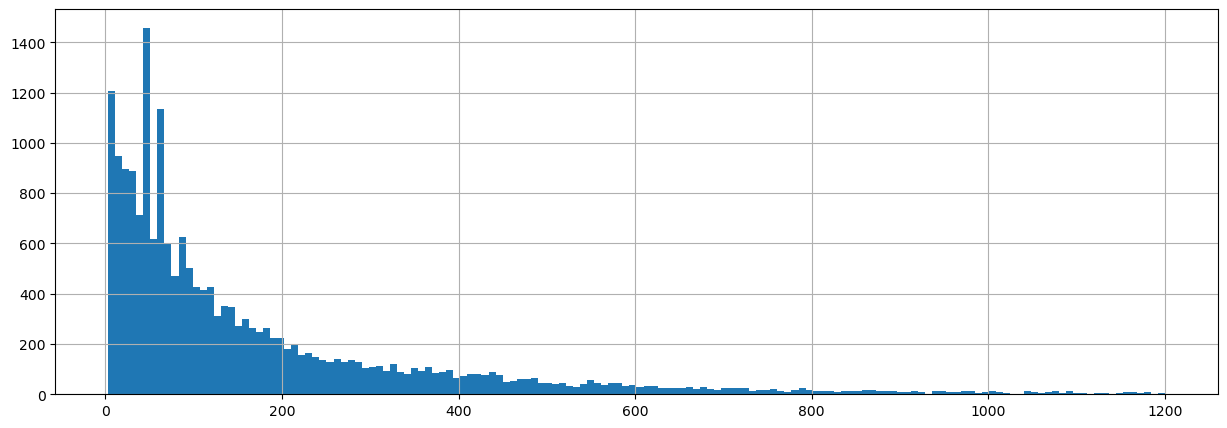

In [73]:
print('Среднее =', data['days_exposition'].mean())
print('Медиана =', data['days_exposition'].median())
print(data['days_exposition'].describe())
data['days_exposition'].hist(bins=150, figsize=(15, 5));

В среднем продажа занимает около 100 дней.  Быстрой можно считать продажу в течение 45 дней, а слишком долгой - более 225 дней.

**Какие факторы больше всего влияют на общую стоимость объекта**

Чтобы выяснить, какие факторы больше всего влияют на стоимость, вычислим коэффиценты корреляции, построим диаграммы рассеяния и графики.

**Общая площадь**

Коэффицент корреляции = 0.772914873125564


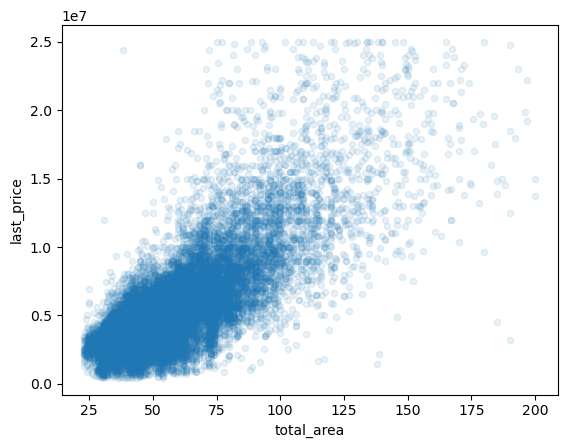

In [74]:
print("Коэффицент корреляции =", data['last_price'].corr(data['total_area']))
data.plot(kind='scatter', x='total_area', y='last_price', alpha = 0.1)
plt.show;

В среднем, с увеличением площади растет и стоимость объекта. Однако,при площади от 75 кв.м. зависимость уменьшается - вероятно, влияют другие факторы. 

**Жилая площадь**

Коэффицент корреляции = 0.6561352638906252


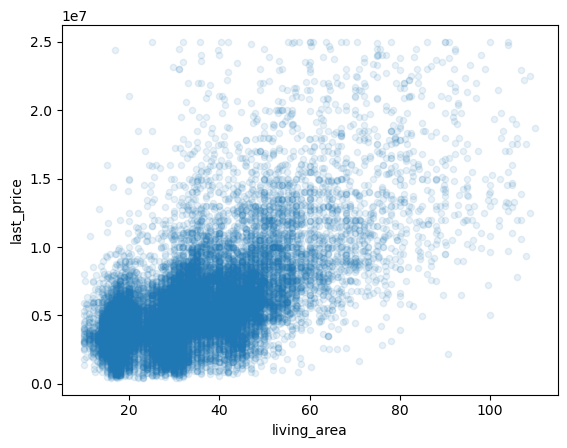

In [75]:
print("Коэффицент корреляции =", data['last_price'].corr(data['living_area']))
data.plot(kind='scatter', x='living_area', y='last_price', alpha = 0.1);
plt.show;

Картина почти такая же, как и с общей площадью, что логично. Но в данном случае другие факторы влияют чуть больше - это видно по числу выбросов в районе нуля.

**Кухонная площадь**

Коэффицент корреляции = 0.6127957526213502


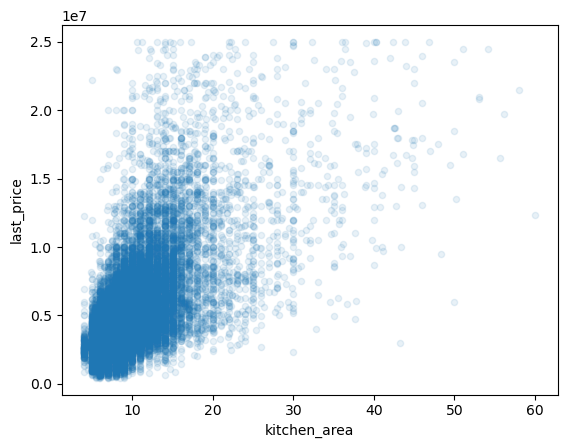

In [76]:
print("Коэффицент корреляции =", data['last_price'].corr(data['kitchen_area']))
data.plot(kind='scatter', x='kitchen_area', y='last_price', alpha = 0.1)
plt.show;

Зависимость намного меньше, но есть. Начиная с площади 10 кв.м. уже видны выбросы. Скорее всего, дело в площади не самой кухни, а общей, поскольку они напрямую связаны.

**Количество комнат**

Коэффицент корреляции = 0.47582273199798036


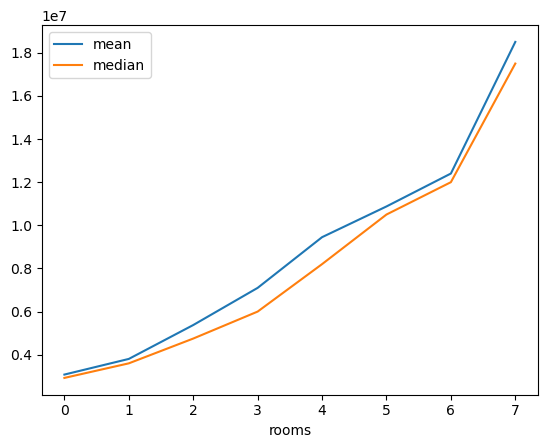

In [77]:
print("Коэффицент корреляции =", data['last_price'].corr(data['rooms']))
data.pivot_table(index='rooms', values='last_price', aggfunc={'mean', 'median'}).plot()
plt.show;

Ожидаемо, что с увеличеснием числа комнат стоимость тоже растет. Виден сильный рост стоимости между 6 комнатами и 7. 

**Этаж**

,last_price
floor_type,
другой,4745500
первый,3899500
последний,4190000


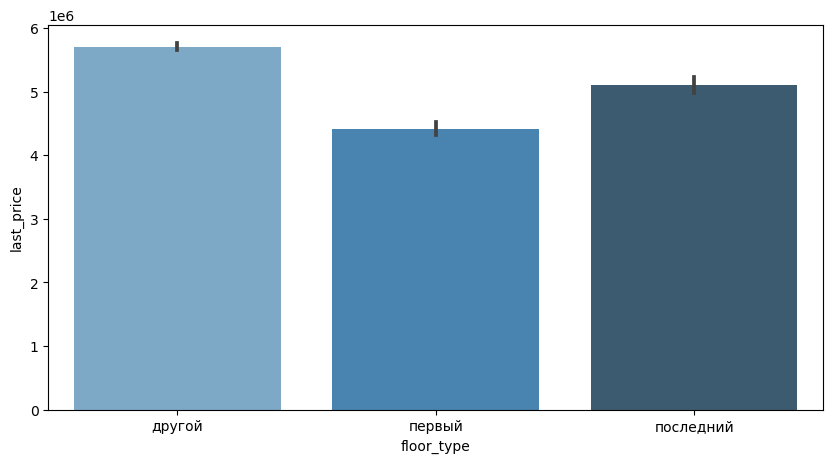

In [78]:
floor_type_price = data.pivot_table(
    index= 'floor_type',
    values= "last_price",
    aggfunc='median'
)
display(floor_type_price)
plt.figure(figsize=(10,5))
bp = (
    sns.barplot(
        x=data['floor_type'], 
        y=data['last_price'], 
        palette='Blues_d'))
bp = bp

Видим, что этаж тоже влияет на стоимость объекта. Квартиры на последнем этаже дороже, чем на первом, но дешевле, чем на других. Выглядит корректно - на первом этаже часто решетки на окнах и в них могут заглядывать прохожие, а также сырость от подвала. На последнем - вероятность протечки крыши, плюс не везде есть лифт.

**День недели**

Коэффицент корреляции = -0.013761622140571094


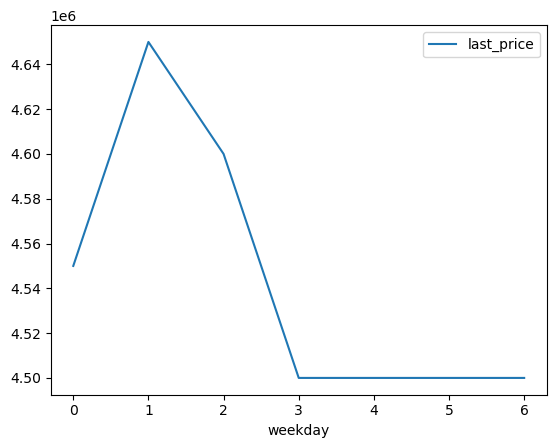

In [79]:
print("Коэффицент корреляции =", data['last_price'].corr(data['weekday']))
data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot()
plt.show;

По коэффиценту корреляции видим, что зависимости стоимости от дня публицкации объявления по сути нет. По графику же видно, что более дешевые объявления публикуются ближе к концу будних в выходные дни. 

**Месяц**

Коэффицент корреляции = 0.004114411248280738


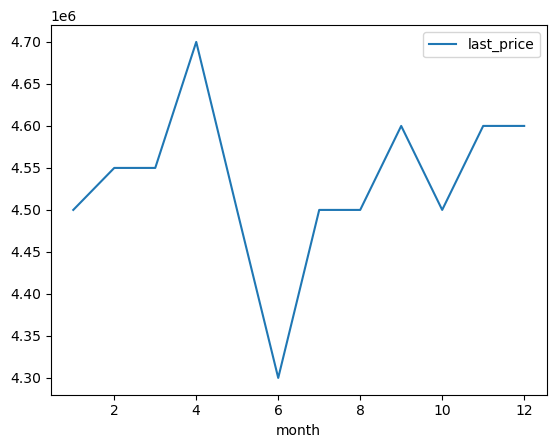

In [80]:
print("Коэффицент корреляции =", data['last_price'].corr(data['month']))
data.pivot_table(index='month', values='last_price', aggfunc='median').plot()
plt.show;

Cудя по цифрам, разница в стоимости не такая большая, но в июне публикуются более недешевые объявления, а в апреле - более дорогие.

**Год**

Коэффицент корреляции = -0.01755603305959475


,median,count
,last_price,last_price
year,,
2014,6325000,102
2015,5050000,1017
2016,4400000,2603
2017,4400000,7772
2018,4500000,8163
2019,4994000,2740


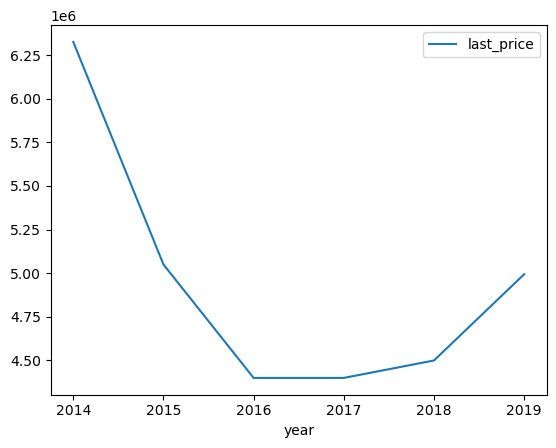

In [81]:
print("Коэффицент корреляции =", data['last_price'].corr(data['year']))
display(data.pivot_table(index='year', values='last_price', aggfunc=['median', 'count']))
data.pivot_table(index='year', values='last_price', aggfunc='median').plot()
plt.show;

2014 год нерепрезентативен из-за маленького количества объявлений, но судя по всему на стоимости жилья сказался кризис 2014-2016 годов. 2016-2017 годы стоимость держалась на одном уровне и только затем начала расти.

**Средняя цена за 1 кв.м. в топ-10 населенных пунктов**

Определим топ-10 населённых пунктах с наибольшим числом объявлений, посчитаем среднюю цену одного квадратного метра.

In [82]:
location_top = (data.groupby('locality_name')['price_per_metre']
                .agg(['count', 'mean']).sort_values(by='count', ascending=False).round().head(10)
)
display(location_top)

,count,mean
locality_name,,
Санкт-Петербург,14655,109411.0
поселок Мурино,537,85310.0
поселок Шушары,435,78483.0
Всеволожск,390,68692.0
Пушкин,348,102063.0
Колпино,336,75240.0
поселок Парголово,325,90260.0
Гатчина,306,68800.0
деревня Кудрово,296,92400.0


 Отсортируем топ по цене за кв.м., чтобы выделить населённые пункты с самой высокой и низкой стоимостью. 

In [83]:
location_top['mean'].sort_values(ascending=False).to_frame()

,mean
locality_name,
Санкт-Петербург,109411.0
Пушкин,102063.0
деревня Кудрово,92400.0
поселок Парголово,90260.0
поселок Мурино,85310.0
поселок Шушары,78483.0
Колпино,75240.0
Гатчина,68800.0
Всеволожск,68692.0


Среди 10 городов с наибольшем количеством объявлений самая низкая стоимость квадратного метра в Выборге - 58222, самая высокая - в Санкт-Петербурге - 112779.

**Средняя цена каждого километра до центра**

Вычислим среднюю цену каждого километра и посмотрим, как стоимость объектов зависит от расстояния до центра города.

,last_price
city_center_km,
0.0,8948750.0
1.0,10671550.0
2.0,10303274.0
3.0,9227160.0
4.0,9549105.0
5.0,9881944.0
6.0,8781437.0
7.0,8609208.0
8.0,8410940.0


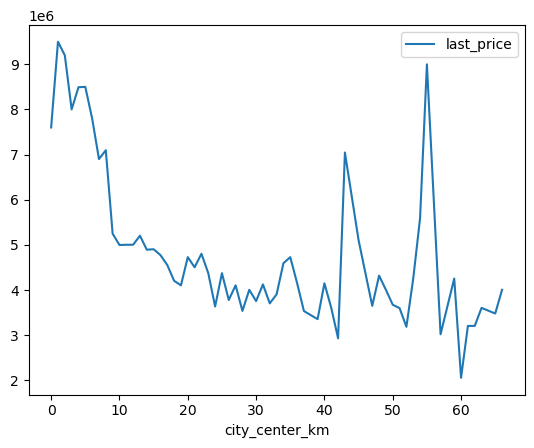

In [84]:
location_spb = data.loc[data['locality_name'] == 'Санкт-Петербург']
center_km_price= data.pivot_table(index = 'city_center_km', values = 'last_price', aggfunc = 'mean').round().head(10)
display(center_km_price)
data.pivot_table(index='city_center_km', values='last_price', aggfunc='median').plot()
plt.show;

Чем дальше от центра, тем ниже стоимость квадратного метра. На расстоянии 20-40 км от центра стоимость скачет и не зависит от удаленности, вероятно, скачки обусловлены типовыми застройками. На расстоянии 45 и 55 км видно сильное повышение стоимости - скорее всего, это новостройки и элитные жк, где жилье стоит больше, чем в старых домах. На 55 км резкий спад - видимо, там находятся совсем окраины.

### Общий вывод

Было проведено исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, по результатам которого отметим следующие моменты:

Больше всего продается объектов площадью 30-70 кв.м., что соответствует одно-, двух- и трехкомнатным квартирам.

Средняя стоимость квартир 2-8 млн. Самая высокая цена за квадратный метр в Санкт-Петербурге, самая низкая - в Выборге. С 2014 по 2016 гг. стоимость жилья падала, с 2017 г. снова начала расти - причина может быть не только в кризисах, но и в уменьшении площади продаваемых объектов.

Больше всего на стоимость влияет общая, жилая, кухонная площади и количество комнат. Квартиры на первом и последнем этажах стоят дешевле, чем на других. Также влияет удаленность от центра - более дорогие объекты находятся либо в центре, либо на ближе к границам города - это может быть обусловлено новостройками и элитными жк.

В среднем продажа объекта занимает около 100 дней.